# Zadanie 1: metoda gradientu prostego

## Import bibliotek

In [1]:
# %matplotlib ipympl
import autograd.numpy as np
from function import Function, Domain
from plotting import plot_function
from solver import Solver, StopConditions
from experiments import single_experiment, experiment_step_sizes

## Definicja funkcji celu i obliczanie gradientów
Gradienty funkcji obliczam za pomocą biblioteki autograd. Jak widać są one bardzo zblione do tych obliczonych analitycznie.

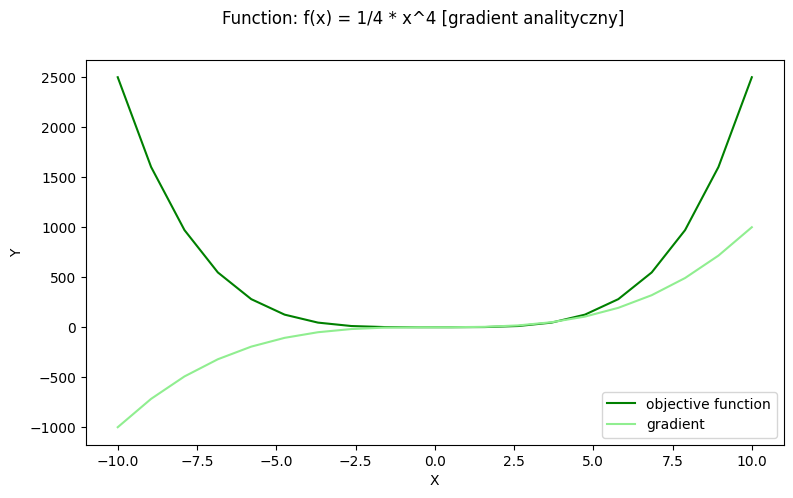

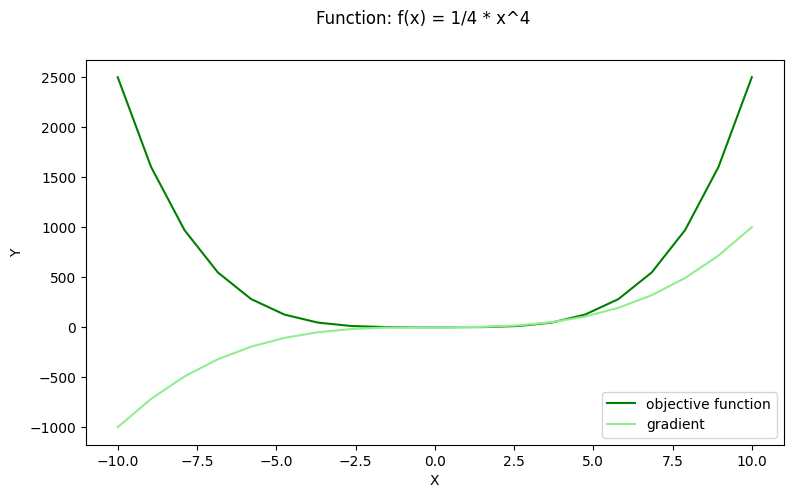

In [2]:
domain_1 = Domain(x = np.linspace(-10, 10, 20))

objective_function_1_given_grad = Function(
  f= lambda x: (1/4)*x**4, 
  gradient= lambda x: np.array(x**3),
  dim=1,
  name="f(x) = 1/4 * x^4 [gradient analityczny]"
)
objective_function_1 = Function(
  f= lambda x: (1/4)*x**4, 
  dim=1,
  name="f(x) = 1/4 * x^4"
)

plot_function(objective_function_1_given_grad, domain=domain_1)
plot_function(objective_function_1, domain=domain_1)


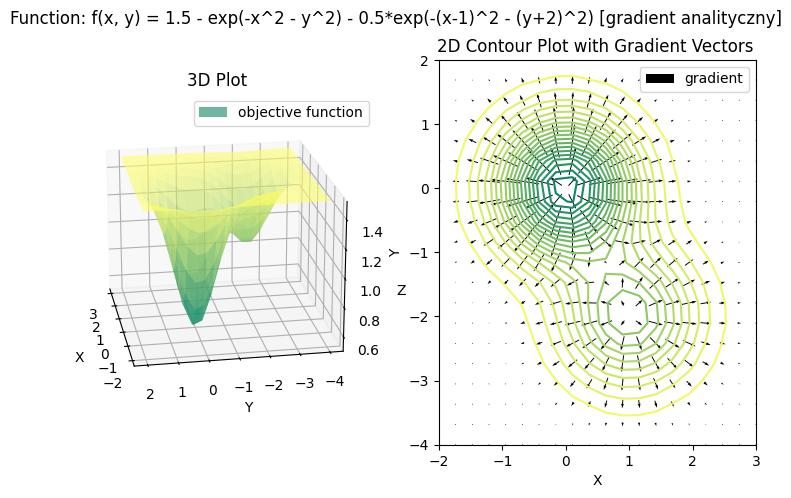

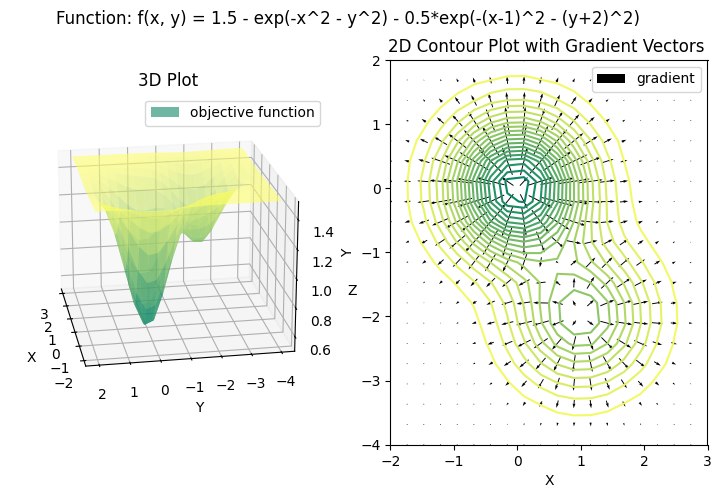

In [3]:
domain_2 = Domain(x = np.linspace(-2, 3, 20), y=np.linspace(-4, 2, 20))

objective_function_2_given_grad = Function(
  f=lambda x: 1.5 - np.exp(-x[0]**2 - x[1]**2) - 0.5*np.exp(-(x[0]-1)**2 - (x[1]+2)**2),
  gradient=lambda x: np.array([2*x[0]*np.exp(-x[0]**2 - x[1]**2) + (x[0]-1)*np.exp(-(x[0]-1)**2 - (x[1]+2)**2), 2*x[1]*np.exp(-x[0]**2 - x[1]**2) + (x[1]+2)*np.exp(-(x[0]-1)**2 - (x[1]+2)**2)]),
  dim=2,
  name="f(x, y) = 1.5 - exp(-x^2 - y^2) - 0.5*exp(-(x-1)^2 - (y+2)^2) [gradient analityczny]"
)
objective_function_2 = Function(
  f=lambda x: 1.5 - np.exp(-x[0]**2 - x[1]**2) - 0.5*np.exp(-(x[0]-1)**2 - (x[1]+2)**2),
  dim=2,
  name="f(x, y) = 1.5 - exp(-x^2 - y^2) - 0.5*exp(-(x-1)^2 - (y+2)^2)"
)


plot_function(objective_function_2_given_grad, domain=domain_2)
plot_function(objective_function_2, domain=domain_2)


## Przykładowy eksperyment dla losowych punktów startowych

Iteration(n_iter=0, time_running=0.0042, x=array([10.]), f_value=2500.0, gradient_value=array([1000.]))


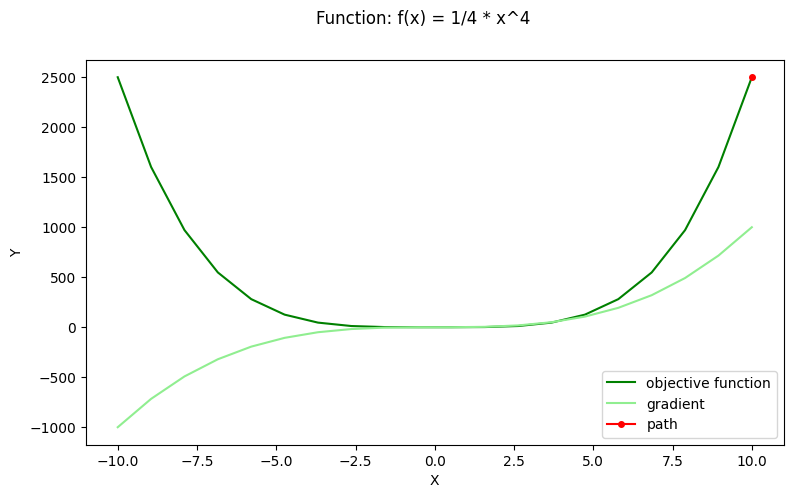

Result(n_iter=1, time_running=0.0056, x=array([-60.]), stop_condition='X_OUT_OF_DOMAIN', f_value=3240000.0, gradient_value=array([-216000.]))




In [4]:
s1 = Solver(
  step_size=0.07,
  stop_conditions=[
    StopConditions.max_time(2),
  ]
)
single_experiment(objective_function_1, domain_1, s1, log=True)

# Można też zdefiniować stały punkt startowy
# single_experiment(objective_function_1, domain_1, s1, log=True, starting_point=np.array([5.]))

Iteration(n_iter=0, time_running=0.0012, x=array([0.10526316, 1.36842105]), f_value=1.3479641699936793, gradient_value=array([0.03200224, 0.41610867]))
Iteration(n_iter=2545, time_running=1.0001, x=array([ 0.00347601, -0.00695203]), f_value=0.4965724836763416, gradient_value=array([-2.08166817e-17,  4.16333634e-17]))
Iteration(n_iter=6190, time_running=2.0001, x=array([ 0.00347601, -0.00695203]), f_value=0.4965724836763416, gradient_value=array([-2.08166817e-17,  4.16333634e-17]))
Iteration(n_iter=9860, time_running=3.0003, x=array([ 0.00347601, -0.00695203]), f_value=0.4965724836763416, gradient_value=array([-2.08166817e-17,  4.16333634e-17]))
Iteration(n_iter=13526, time_running=4.0002, x=array([ 0.00347601, -0.00695203]), f_value=0.4965724836763416, gradient_value=array([-2.08166817e-17,  4.16333634e-17]))


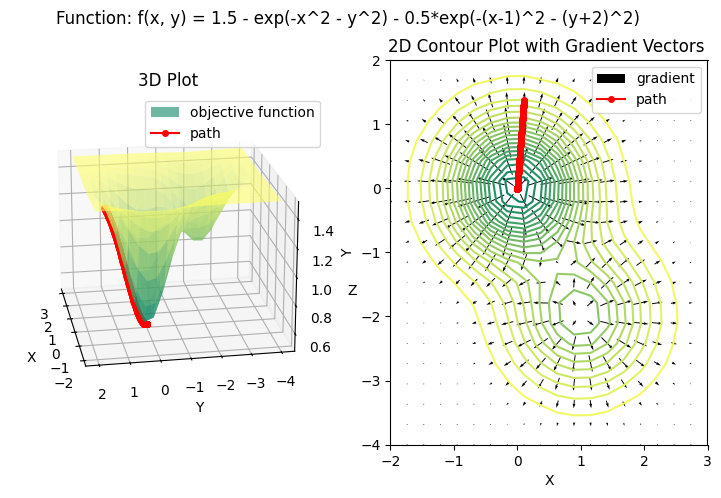

Result(n_iter=17192, time_running=5.0, x=array([ 0.00347601, -0.00695203]), stop_condition='max_time(5)', f_value=0.4965724836763416, gradient_value=array([-2.08166817e-17,  4.16333634e-17]))




In [5]:
s2 = Solver(
  stop_conditions=[
    StopConditions.max_time(5),
  ]
)
single_experiment(objective_function_2, domain_2, s2, log=True)

## Eksperyment dla różnych rozmiarów kroku i losowych punktów startowych

In [6]:
step_sizes_1 = [0.005, 0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
conditions_1 = [
  [StopConditions.max_time(5), StopConditions.min_gradient(1e-6)],
  [StopConditions.min_gradient(1e-4)],
  [StopConditions.max_time(5)],
  [StopConditions.max_iterations(20000)]
]
experiment_step_sizes(objective_function_1, domain_1, step_sizes_1, conditions_1, n_starting_points=10)

Generating starting points...
Starting points:  [array([2.63157895]), array([-7.89473684]), array([10.]), array([10.]), array([-7.89473684]), array([-2.63157895]), array([-1.57894737]), array([1.57894737]), array([-8.94736842]), array([10.])]


(1/320) [00:00] step_size=0.005 max_time(5) min_gradient(1e-06) starting_point=[2.63157895]
Iteration(n_iter=0, time_running=0.001, x=array([2.63157895]), f_value=11.989625616746345, gradient_value=array([18.22423094]))
Iteration(n_iter=14555, time_running=1.0001, x=array([0.08283253]), f_value=1.1769112824486502e-05, gradient_value=array([0.00056833]))
Iteration(n_iter=31518, time_running=2.0001, x=array([0.05630946]), f_value=2.5134219245713282e-06, gradient_value=array([0.00017854]))
Iteration(n_iter=48188, time_running=3.0001, x=array([0.04554471]), f_value=1.0757018526560728e-06, gradient_value=array([9.4474354e-05]))
Iteration(n_iter=64551, time_running=4.0001, x=array([0.03935307]), f_value=5.99590401416497e-07, gradient_value=array([6.09

In [ ]:
step_sizes_2 = [0.005, 0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
conditions_2 = [
  [StopConditions.max_time(5), StopConditions.min_gradient(1e-6)],
  [StopConditions.min_gradient(1e-4)],
  [StopConditions.max_time(5)],
  [StopConditions.max_iterations(20000)]
]
experiment_step_sizes(objective_function_2, domain_2, step_sizes_2, conditions_2, n_starting_points=10)

## Wnioski